In [1]:
import os
from pydap.client import open_url
import xarray as xr
import datetime
from datetime import timedelta, date
import netCDF4 as nc
from netCDF4 import Dataset
import os
import sys
sys.path.append(os.path.abspath(".."))
from utils.degree_day_equations import *
from utils.net_cdf_functions import *
from utils.processing_functions import *
#from utils.visualization_functions import *

import pandas as pd
#from visualization_functions import *
import numpy as np
data_path =  "../data/"

In [2]:


#dask instance
from dask.distributed import Client
client = Client(n_workers=20, threads_per_worker=1, memory_limit='15GB')
client


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 20
Total threads: 20,Total memory: 279.40 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:54197,Workers: 20
Dashboard: http://127.0.0.1:8787/status,Total threads: 20
Started: Just now,Total memory: 279.40 GiB
Comm: tcp://127.0.0.1:54318,Total threads: 1
Dashboard: http://127.0.0.1:54336/status,Memory: 13.97 GiB
Nanny: tcp://127.0.0.1:54200,


In [5]:
combined_dd_data = xr.open_dataset("../data/temp/socal_medfly_dd_data.nc")


In [6]:
combined_dd_data

<xarray.Dataset> Size: 2GB
Dimensions:      (t: 9064, longitude: 169, latitude: 169)
Coordinates:
  * t            (t) datetime64[ns] 73kB 2000-01-01 2000-01-02 ... 2024-10-24
  * longitude    (longitude) float64 1kB -122.5 -122.5 -122.5 ... -115.6 -115.5
  * latitude     (latitude) float64 1kB 39.58 39.54 39.5 ... 32.67 32.62 32.58
Data variables:
    degree_days  (t, latitude, longitude) float64 2GB ...

In [20]:
import pandas as pd
detections = pd.read_csv("../data/detections/detection_quarantine.csv")
ca_medfly = detections[detections["Common Name"] == "Medfly"]
ca_medfly = ca_medfly[ca_medfly["State"] == "CA"]
lat_min = ca_medfly["LAT"].min()
lat_max = ca_medfly["LAT"].max()
lon_min = ca_medfly["LON"].min()
lon_max = ca_medfly["LON"].max()

#data = testing_load_data(data_path,"2000-01-01",LTT= 9.4, UTT = 999, lat_min = lat_min, lat_max= lat_max, lon_min = lon_min, lon_max = lon_max)



In [3]:
#write data to data/temp/socal_medfly_dd_data.nc
data.to_netcdf("../data/temp/socal_medfly_dd_data.nc")


In [10]:
#turn bbox into a dict of lat and lon with lat_min long_max etc 36.405810,-119.855347,36.710265,-119.200287
def bbox_to_dict(bbox):
    bbox = bbox.split(",")
    bbox_dict = {}
    bbox_dict["lat_min"] = float(bbox[0])
    bbox_dict["lon_min"] = float(bbox[1])
    bbox_dict["lat_max"] = float(bbox[2])
    bbox_dict["lon_max"] = float(bbox[3])
    return bbox_dict

bbox = "36.405810,-119.855347,36.710265,-119.200287"
bbox_dict = bbox_to_dict(bbox)
LTT = 9.4
UTT = 999

data = testing_load_data(data_path , "2000-01-01", lat = 36.558188, lon = -119.527130, LTT = 9.4, UTT = 999, window = 2 )
data.to_netcdf("../data/temp/orange_grvove_test.nc")

#load data
'''
combined_dd_data = xr.open_dataset("../data/temp/orange_grvove_test.nc")
mod_1_dd_data = combined_dd_data
mod_1_dd_data['day_of_year'] = mod_1_dd_data.indexes['t'].dayofyear
mod_1_dd_data = mod_1_dd_data.set_coords('day_of_year')
mod_1_data = mod_1_dd_data.groupby('day_of_year').mean('t')
mod_1_data_dd = mod_1_data['degree_days'].values
'''


downloading recent weather data
Missing file for ../data/PRISM\2024\PRISM_temp_20241025.nc
Missing file for ../data/PRISM\2024\PRISM_temp_20241026.nc
Missing file for ../data/PRISM\2024\PRISM_temp_20241027.nc
Missing file for ../data/PRISM\2024\PRISM_temp_20241028.nc
Missing file for ../data/PRISM\2024\PRISM_temp_20241029.nc
Missing file for ../data/PRISM\2024\PRISM_temp_20241030.nc
Missing file for ../data/PRISM\2024\PRISM_temp_20241031.nc
Missing file for ../data/PRISM\2024\PRISM_temp_20241101.nc
Missing file for ../data/PRISM\2024\PRISM_temp_20241102.nc
Missing file for ../data/PRISM\2024\PRISM_temp_20241103.nc
Missing file for ../data/PRISM\2024\PRISM_temp_20241104.nc
Missing file for ../data/PRISM\2024\PRISM_temp_20241105.nc
Missing file for ../data/PRISM\2024\PRISM_temp_20241106.nc
Missing file for ../data/PRISM\2024\PRISM_temp_20241107.nc
Missing file for ../data/PRISM\2024\PRISM_temp_20241108.nc
Missing file for ../data/PRISM\2024\PRISM_temp_20241109.nc
Missing file for ../data

'\ncombined_dd_data = xr.open_dataset("../data/temp/orange_grvove_test.nc")\nmod_1_dd_data = combined_dd_data\nmod_1_dd_data[\'day_of_year\'] = mod_1_dd_data.indexes[\'t\'].dayofyear\nmod_1_dd_data = mod_1_dd_data.set_coords(\'day_of_year\')\nmod_1_data = mod_1_dd_data.groupby(\'day_of_year\').mean(\'t\')\nmod_1_data_dd = mod_1_data[\'degree_days\'].values\n'

In [ ]:


def fflies_model_1(data, start, threshold):
    #start is the index of the first day of the year
    #initialize variables
    cumsum = 0
    elapsed_days = 0
    #iterate through the data array starting from the given start position
    for i in range(start, len(data)):
        #add the value of the current position to the cumsum
        cumsum += data[i]
        #increment the elapsed days
        elapsed_days += 1
        #if the cumsum is greater than or equal to the threshold, return the number of elapsed days
        if cumsum >= threshold:
            return elapsed_days
    #if the end of the array is reached, start over from the beginning and keep counting
    for i in range(0, start):
        cumsum += data[i]
        elapsed_days += 1
        if cumsum >= threshold:
            return elapsed_days
    return elapsed_days
# Loop through each fly species

<xarray.Dataset> Size: 27MB
Dimensions:      (day_of_year: 366, latitude: 96, longitude: 96)
Coordinates:
  * longitude    (longitude) float64 768B -121.5 -121.5 -121.4 ... -117.6 -117.5
  * latitude     (latitude) float64 768B 38.54 38.5 38.46 ... 34.67 34.62 34.58
  * day_of_year  (day_of_year) int32 1kB 1 2 3 4 5 6 ... 361 362 363 364 365 366
Data variables:
    degree_days  (day_of_year, latitude, longitude) float64 27MB 1.117 ... 1.154

In [27]:
latitude = 36.631151
longitude = -119.338321
window_size = 6

# Find the indices of the given point
lat_idx = results_da.latitude.sel(latitude=latitude, method='nearest').item()
lon_idx = results_da.longitude.sel(longitude=longitude, method='nearest').item()

# Find the index positions
lat_pos = results_da.latitude.values.tolist().index(lat_idx)
lon_pos = results_da.longitude.values.tolist().index(lon_idx)

# Select a window of pixels around those indices
subset_da = results_da.isel(
    latitude=slice(lat_pos - window_size, lat_pos + window_size + 1),
    longitude=slice(lon_pos - window_size, lon_pos + window_size + 1)
)


In [ ]:
#model 1 or averages compute
@delayed
def fflies_model_1(data, start, threshold):
    # Ensure data is an xarray DataArray
    if isinstance(data, np.ndarray):
        data = xr.DataArray(data)
    
    # Initialize cumulative sum and elapsed days
    cumsum = 0
    elapsed_days = 0
    
    # Iterate through the data array starting from the given start position
    for i in range(start, len(data)):
        # Add the value of the current position to the cumsum
        cumsum += data[i]
        # Increment the elapsed days
        elapsed_days += 1
        # If the cumsum is greater than or equal to the threshold, return the number of elapsed days
        if cumsum >= threshold:
            return elapsed_days
    
    # If the end of the array is reached, start over from the beginning and keep counting
    for i in range(0, start):
        cumsum += data[i]
        elapsed_days += 1
        if cumsum >= threshold:
            return elapsed_days
    
    # If the threshold is not reached, return the total number of days
    return elapsed_days
@delayed
def apply_fflies_model_run(data, date, dd_threshold=754):
    # Apply the wrapper function over the x and y dimensions
    result = xr.apply_ufunc(
        fflies_model_1,
        data,
        date,
        dd_threshold,
        input_core_dims=[['day_of_year'], [], []],
        output_core_dims=[[]],
        vectorize=True,
        dask='parallelized',
        output_dtypes=[int]
    )
    return result

# Example usage


results = []

# Loop through each date from 1 to 365
for date in range(1, 366):
    print(date)
    result = apply_fflies_model_run(mod_1_data_chunked, date, dd_threshold=754)
    results.append(result)

# Combine the results into an xarray DataArray
results_da = xr.concat(results, dim='start_day_of_year')
results_da['start_day_of_year'] = np.arange(1, 366)

# Save the DataArray as a NetCDF file


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [4]:
data

<xarray.DataArray 'degree_days' (t: 9064, latitude: 169, longitude: 169)> Size: 2GB
array([[[1.36420591e+00, 1.32104267e+00, 1.47184349e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.39919840e+00, 1.37340490e+00, 1.55252032e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.46946348e+00, 1.52044911e+00, 1.57533130e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [           nan,            nan,            nan, ...,
         4.29604868e+00, 4.31896569e+00, 4.36204080e+00],
        [           nan,            nan,            nan, ...,
         4.29442967e+00, 4.31989937e+00, 4.33304127e+00],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan]],

       [[8.57602095e-04, 3.90015560e-03, 3.03862748e-03, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [3.65782707e-03, 5.93525347e-03, 3.59028365e-03, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.14176423e-02, 1.10316387e-02, 1.38429006e-02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
...
        [           nan,            nan,            nan, ...,
         1.51756497e+01, 1.51134001e+01, 1.50784498e+01],
        [           nan,            nan,            nan, ...,
         1.51433002e+01, 1.51010996e+01, 1.50976988e+01],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan]],

       [[7.69182753e+00, 6.97558095e+00, 7.54853516e+00, ...,
         4.70686015e+00, 4.67662688e+00, 4.49132850e+00],
        [7.62537394e+00, 7.05107483e+00, 7.67765854e+00, ...,
         4.76983011e+00, 4.70833911e+00, 4.52384840e+00],
        [7.55339597e+00, 7.31596749e+00, 7.35119627e+00, ...,
         4.71230984e+00, 4.64560638e+00, 4.46153162e+00],
        ...,
        [           nan,            nan,            nan, ...,
         1.58754989e+01, 1.59314500e+01, 1.59757486e+01],
        [           nan,            nan,            nan, ...,
         1.58763491e+01, 1.58995486e+01, 1.59303494e+01],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan]]])
Coordinates:
  * t          (t) datetime64[ns] 73kB 2000-01-01 2000-01-02 ... 2024-10-24
  * longitude  (longitude) float64 1kB -122.5 -122.5 -122.5 ... -115.6 -115.5
  * latitude   (latitude) float64 1kB 39.58 39.54 39.5 ... 32.67 32.62 32.58

In [4]:
#full compute
from dask import delayed
import time
def fflies_model_1(data, start, threshold):
    # Ensure data is an xarray DataArray
    if isinstance(data, np.ndarray):
        data = xr.DataArray(data)
    
    # Initialize cumulative sum and elapsed days
    cumsum = 0
    elapsed_days = 0
    
    # Iterate through the data array starting from the given start position
    for i in range(start, len(data)):
        # Add the value of the current position to the cumsum
        if np.isnan(data[i]):
            return -1
        cumsum += data[i]
        # Increment the elapsed days
        elapsed_days += 1
        # If the cumsum is greater than or equal to the threshold, return the number of elapsed days
        if cumsum >= threshold:
            return elapsed_days
    
    # If the end of the array is reached, start over from the beginning and keep counting
    for i in range(0, start):
        cumsum += data[i]
        elapsed_days += 1
        if cumsum >= threshold:
            return elapsed_days
    
    # If the threshold is not reached, return the total number of days
    return elapsed_days
def apply_fflies_model_run(data, date, dd_threshold=754):
    # Apply the wrapper function over the x and y dimensions
    result = xr.apply_ufunc(
        fflies_model_1,
        data,
        date,
        dd_threshold,
        input_core_dims=[['t'], [], []],
        output_core_dims=[[]],
        vectorize=True,
        dask='parallelized',
        output_dtypes=[int]
    )
    return result

# Example usage

combined_dd_data = xr.open_dataset("../data/temp/socal_medfly_dd_data.nc")
combined_dd_data_chunked = combined_dd_data.chunk({'latitude': 15, 'longitude':15})
results = []
import datetime
from datetime import timedelta

# Loop through each date from 1 to 365
year_list = [2001, 2004, 2008 , 2014, 2018]
#I think here instead of using a datetime as an indexer, I want to use the index position of that date in the data array - maybe a dict of the two?
for year in year_list:
    print(year)
    for day_of_year in range(1, 366):
        if day_of_year % 10 == 0:
            print(day_of_year)
            start_day = datetime.datetime(year, 1, 1) + timedelta(days=day_of_year - 1)
            time_index = np.argwhere(combined_dd_data_chunked.t.values == np.datetime64(start_day)).flatten()[0]
            
            result = apply_fflies_model_run(combined_dd_data_chunked, time_index, dd_threshold=754)
            results.append(result)
            result.compute()
            result.to_netcdf("../data/socal_daily_completions/daily_F3_completions" + str(year) + str(day_of_year) + ".nc")
            #wait for 120 seconds
            time.sleep(15)

# Combine the results into an xarray DataArray
    #results_da = xr.concat(results, dim='t')
    #results_da['start_day_of_year'] = np.arange(1, 366)

    # Save the DataArray as a NetCDF file
    #results_da = results.compute()
    #turn all the -1s into nan
    #results_da = results_da.where(results_da != -1)


    #results_da.to_netcdf("../data/socal_daily_completions/daily_F3_completions" + str(year) + ".nc")


2001
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
2004
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
2008
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
2014
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
2018
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360


In [17]:
path = "../data/socal_daily_completions/"
files = os.listdir(path)
files = [path + file for file in files]

datasets = []
for i, file in enumerate(files):
    ds = xr.open_dataset(file)
    # Add a time dimension
    ds = ds.expand_dims(time=[i])
    datasets.append(ds)

# Concatenate all datasets along the time dimension
combined_data = xr.concat(datasets, dim='time')

# Display the combined dataset
print(combined_data)

<xarray.Dataset> Size: 21MB
Dimensions:      (time: 184, latitude: 169, longitude: 169)
Coordinates:
  * time         (time) int32 736B 0 1 2 3 4 5 6 ... 177 178 179 180 181 182 183
  * longitude    (longitude) float64 1kB -122.5 -122.5 -122.5 ... -115.6 -115.5
  * latitude     (latitude) float64 1kB 39.58 39.54 39.5 ... 32.67 32.62 32.58
Data variables:
    degree_days  (time, latitude, longitude) int32 21MB 167 170 166 ... -1 -1 -1


In [2]:
from geopy.distance import geodesic

def calculate_neighborhood_range(data, lat, lon, radius_km):
    # Calculate the distance from the target point to all other points
    distances = np.vectorize(geodesic)((lat, lon), (data.latitude, data.longitude))
    
    # Create a mask for points within the specified radius
    mask = distances <= radius_km
    
    # Extract the neighborhood values
    neighborhood = data.where(mask, drop=True)
    
    # Calculate the range, ignoring NaN values
    neighborhood_range = neighborhood.max() - neighborhood.min()
    
    return neighborhood_range

combined_data.latitude

In [27]:
results = []
for index, row in ca_medfly.iterrows():
    lat = row['LAT']
    lon = row['LON']
    print(lat, lon)
    range_value = calculate_neighborhood_range(combined_data, lat, lon, radius_km=25)
    results.append({
        'latitude': lat,
        'longitude': lon,
        'range': range_value
    })


37.53 -121.97


ValueError: A single number has been passed to the Point constructor. This is probably a mistake, because constructing a Point with just a latitude seems senseless. If this is exactly what was meant, then pass the zero longitude explicitly to get rid of this error.

In [111]:
import os
import xarray as xr
import pandas as pd
import numpy as np

path = "../data/socal_daily_completions/"
files = os.listdir(path)
files = [path + file for file in files]

datasets = []
for file in files:
    # Extract the time string from the filename
    filename = os.path.basename(file)
    time_str = filename.split('daily_F3_completions')[1]
    
    # Convert the time string to a datetime object
    
    # Open the dataset and add the time dimension
    ds = xr.open_dataset(file)
    ds = ds.expand_dims(time=[time_str])
    datasets.append(ds)

# Concatenate all datasets along the time dimension
combined_data = xr.concat(datasets, dim='time')

# Display the combined dataset
#print(combined_data)

#convert dataset to data array
data_array = combined_data['degree_days']
print(data_array)
#data_array = data_array.rename({'variable': 'time'})
#data_array = data_array.transpose('latitude', 'longitude', 'time')

print(data_array)

<xarray.DataArray 'degree_days' (time: 184, latitude: 169, longitude: 169)> Size: 21MB
array([[[167, 170, 166, ..., 206, 207, 206],
        [168, 170, 166, ..., 205, 206, 206],
        [168, 169, 168, ..., 205, 206, 207],
        ...,
        [ -1,  -1,  -1, ..., 103, 103, 103],
        [ -1,  -1,  -1, ..., 103, 103, 103],
        [ -1,  -1,  -1, ...,  -1,  -1,  -1]],

       [[166, 169, 165, ..., 205, 206, 205],
        [167, 169, 165, ..., 204, 205, 205],
        [167, 168, 167, ..., 204, 205, 206],
        ...,
        [ -1,  -1,  -1, ..., 102, 102, 102],
        [ -1,  -1,  -1, ..., 103, 103, 103],
        [ -1,  -1,  -1, ...,  -1,  -1,  -1]],

       [[165, 168, 164, ..., 204, 205, 204],
        [166, 168, 164, ..., 203, 204, 204],
        [166, 167, 166, ..., 203, 204, 205],
        ...,
...
        ...,
        [ -1,  -1,  -1, ...,  61,  61,  61],
        [ -1,  -1,  -1, ...,  61,  61,  61],
        [ -1,  -1,  -1, ...,  -1,  -1,  -1]],

       [[ 92,  95,  92, ..., 127, 127, 12

In [48]:
combined_data

<xarray.Dataset> Size: 21MB
Dimensions:      (time: 184, latitude: 169, longitude: 169)
Coordinates:
  * time         (time) object 1kB '20001.nc' '20002.nc' ... '201890.nc'
  * longitude    (longitude) float64 1kB -122.5 -122.5 -122.5 ... -115.6 -115.5
  * latitude     (latitude) float64 1kB 39.58 39.54 39.5 ... 32.67 32.62 32.58
Data variables:
    degree_days  (time, latitude, longitude) int32 21MB 167 170 166 ... -1 -1 -1

In [18]:
print(data_array)

NameError: name 'data_array' is not defined

In [29]:
import numpy as np
import xarray as xr
import pandas as pd
from geopy.distance import geodesic

# Define a function to calculate the range of values in a neighborhood
def calculate_neighborhood_range(data, lat, lon, radius_km):
    # Calculate the distance from the target point to all other points
    distances = np.zeros((len(data.latitude), len(data.longitude)))
    for i, lat_val in enumerate(data.latitude):
        for j, lon_val in enumerate(data.longitude):
            distances[i, j] = geodesic((lat, lon), (lat_val.item(), lon_val.item())).km
    
    # Create a mask for points within the specified radius
    mask = distances <= radius_km
    mask_da = xr.DataArray(mask, dims=["latitude", "longitude"], coords={"latitude": data.latitude, "longitude": data.longitude})
    
    # Extract the neighborhood values
    neighborhood = data.where(mask_da, drop=True)
    
    # Extract the neighborhood values
    
    # Calculate the range, ignoring NaN values
    neighborhood_range = neighborhood.max().item() - neighborhood.min().item()
    
    return neighborhood_range
# Example usage
detections = pd.read_csv("../data/detections/detection_quarantine.csv", encoding='latin1')
detections_ca = detections[detections['State'] == 'CA']

# Assuming combined_data is already loaded and contains the combined dataset

# Iterate through each point in the detections DataFrame
results = []
for index, row in detections_ca.iterrows():
    lat = row['LAT']
    lon = row['LON']
    range_value = calculate_neighborhood_range(combined_data, lat, lon, radius_km=25)
    results.append({
        'latitude': lat,
        'longitude': lon,
        'range': range_value
    })

# Convert the results to a DataFrame
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

AttributeError: 'Dataset' object has no attribute 'item'

In [113]:
import numpy as np
import xarray as xr
import pandas as pd
import rasterio
import rioxarray
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from rasterio.features import geometry_mask

# Define a function to calculate the range of values in a neighborhood
def calculate_neighborhood_range(data, lat, lon, radius_km):
    # Convert radius from km to degrees (approximation)
    #print(data.time)
    radius_deg = radius_km / 111.32
    
    # Create a buffer around the point
    point = Point(lon, lat)
    buffer = point.buffer(radius_deg)
    
    # Create a mask for the buffer
    mask = geometry_mask([buffer], transform=data.rio.transform(), invert=True, out_shape=(data.rio.height, data.rio.width))
    
    # Extract the neighborhood values
    mask_da = xr.DataArray(mask, dims=["latitude", "longitude", ], coords={"latitude": data.latitude, "longitude": data.longitude})
    mask_da = mask_da.expand_dims(time=data.time)
    # Extract the neighborhood values
    neighborhood = data.where(mask_da, drop=True)
    # Calculate the range, ignoring NaN values
    neighborhood_ranges = []
    dates = []
    for t in neighborhood:
        # Apply the mask for the current time slice
        # Calculate the range for the current time slice, ignoring NaN values
        #filter values to only include values that are not nan
        date = t.time.values
        data = t.values
        #print(data)
        neighborhood = t.where(~np.isnan(t), drop=True)
        # drop values < 0
        neighborhood = neighborhood.where(neighborhood > 0, drop=True)
        max_val = neighborhood.max(skipna=True)
        min_val = neighborhood.min(skipna=True)
        neighborhood_range = t.max(skipna=True)- neighborhood.min(skipna=True)
        #print(neighborhood_range.values)
        neighborhood_ranges.append(neighborhood_range.values)
        dates.append(date)
        
    # Find the maximum range and the date of the maximum range
    max_range = max(neighborhood_ranges)
    date_of_max = dates[neighborhood_ranges.index(max_range)]


    return max_range, date_of_max

# Example usage
detections = pd.read_csv("../data/detections/detection_quarantine.csv", encoding='latin1')
detections_ca = detections[detections['State'] == 'CA']
#make sample_detections_ca that samples 500 random points from detections_ca
sample_detections_ca = detections_ca.sample(500)
det_test = detections_ca.head(2)
# Assuming combined_data is already loaded and contains the combined dataset

# Iterate through each point in the detections DataFrame
results = []
for index, row in det_test.iterrows():
    if index % 10 == 0:
        print(index)
    lat = row['LAT']
    lon = row['LON']
    range_value,date = calculate_neighborhood_range(data_array, lat, lon, radius_km=15)
    results.append({
        'latitude': lat,
        'longitude': lon,
        'range': range_value,
        'date' : date
    })

# Convert the results to a DataFrame
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

   latitude  longitude range        date
0     37.53    -121.97  79.0  2001240.nc
1     37.51    -121.92  76.0  2001250.nc


In [99]:
results_df

,latitude,longitude,range,date
0,37.53,-121.97,79.0,2001240.nc
1,37.51,-121.92,76.0,2001250.nc
2,37.52,-121.96,76.0,2001240.nc
3,37.60,-122.02,86.0,2018240.nc
4,33.98,-117.44,29.0,2018280.nc
5,37.54,-121.95,79.0,2001240.nc
6,37.54,-121.95,79.0,2001240.nc
7,37.52,-121.96,76.0,2001240.nc
8,34.01,-117.54,28.0,2018280.nc
9,37.52,-121.97,76.0,2001240.nc


In [100]:
results_df = pd.DataFrame(results)
results_df

,latitude,longitude,range,date
0,32.81,-117.20,192.0,2001320.nc
1,37.29,-121.92,100.0,2018250.nc
2,34.20,-118.37,108.0,2018280.nc
3,34.38,-118.60,88.0,2018270.nc
4,37.37,-122.02,73.0,2001250.nc
...,...,...,...,...
118,34.39,-118.59,86.0,2018270.nc
119,32.82,-117.20,200.0,2001320.nc
120,32.80,-116.90,87.0,2018270.nc
121,37.31,-121.90,47.0,2018260.nc


In [115]:
import xarray as xr
import holoviews as hv
import hvplot.xarray
from shapely.geometry import Point
import geopandas as gpd

# Enable Holoviews extension
hv.extension('bokeh')

# Load the NetCDF file
data = xr.open_dataset("../data/socal_daily_completions/daily_F3_completions2001320.nc")

# Select the variable you want to plot (assuming 'degree_days' is the variable of interest)
data_array = data['degree_days']

# Create an interactive plot using hvplot
plot = data_array.hvplot.quadmesh(x='longitude', y='latitude', rasterize=True, cmap='viridis', title='Degree Days')

# Define the point and radius
point_lat = 37.53
point_lon = -121.92
radius_km = 20

# Create a point
point = hv.Points((point_lon, point_lat), label='Point').opts(color='red', size=10)

# Create a circle with a radius of 15 km
radius_deg = radius_km / 111.32  # Convert radius from km to degrees (approximation)
circle = Point(point_lon, point_lat).buffer(radius_deg)
circle_gdf = gpd.GeoDataFrame(geometry=[circle])
circle_path = hv.Path([circle_gdf.geometry[0].exterior.coords], label='Circle').opts(color='red')

# Overlay the point and circle on the plot
combined_plot = plot * point * circle_path

# Display the plot
hv.output(combined_plot)

BokehModel(combine_events=True, render_bundle={'docs_json': {'0d2f4ad1-1104-426b-93b6-0c489ad67f25': {'version…

In [7]:
import xarray as xr
import holoviews as hv
import hvplot.xarray
import geoviews as gv
from shapely.geometry import Point
import geopandas as gpd
from cartopy import crs as ccrs

# Enable Holoviews and Geoviews extensions
hv.extension('bokeh')
gv.extension('bokeh')

# Load the NetCDF file
data = xr.open_dataset("../data/socal_daily_completions/daily_F3_completions2001320.nc")

# Select the variable you want to plot (assuming 'degree_days' is the variable of interest)
data_array = data['degree_days']

# Create an interactive plot using hvplot
plot = data_array.hvplot.quadmesh(x='longitude', y='latitude', rasterize=True, cmap='viridis', title='Degree Days', project=True, geo=True)

# Define the point and radius
point_lat = 32.18
point_lon = -117.20
radius_km = 15

# Create a point
point = gv.Points([(point_lon, point_lat)], crs=ccrs.PlateCarree(), label='Point').opts(color='red', size=10)

# Create a circle with a radius of 15 km
radius_deg = radius_km / 111.32  # Convert radius from km to degrees (approximation)
circle = Point(point_lon, point_lat).buffer(radius_deg)
circle_gdf = gpd.GeoDataFrame(geometry=[circle], crs="EPSG:4326")
circle_path = gv.Path([circle_gdf.geometry[0].exterior.coords], crs=ccrs.PlateCarree(), label='Circle').opts(color='red')

# Overlay the point and circle on the plot
combined_plot = plot * point * circle_path

# Add a basemap
tiles = gv.tile_sources.OSM()

# Combine the basemap with the plot
final_plot = tiles * combined_plot

# Display the plot
hv.output(final_plot)

BokehModel(combine_events=True, render_bundle={'docs_json': {'56bfe87d-c143-4efe-bd0f-80e0ec9f85f1': {'version…

In [8]:
import xarray as xr
import holoviews as hv
import hvplot.xarray

# Enable Holoviews extension
hv.extension('bokeh')

# Load the NetCDF file
data = xr.open_dataset("../data/socal_daily_completions/daily_F3_completions2001320.nc")

# Select the variable you want to plot (assuming 'degree_days' is the variable of interest)
data_array = data['degree_days']

# Create an interactive plot using hvplot
plot = data_array.hvplot.quadmesh(x='longitude', y='latitude', rasterize=True, cmap='viridis', title='Degree Days')

# Display the plot
hv.output(plot)

BokehModel(combine_events=True, render_bundle={'docs_json': {'7ac2d8a3-d6da-4095-8ed0-920d858e089a': {'version…

[-122.27440891124685, -121.64559108875314, 37.19559108875314, 37.824408911246856]


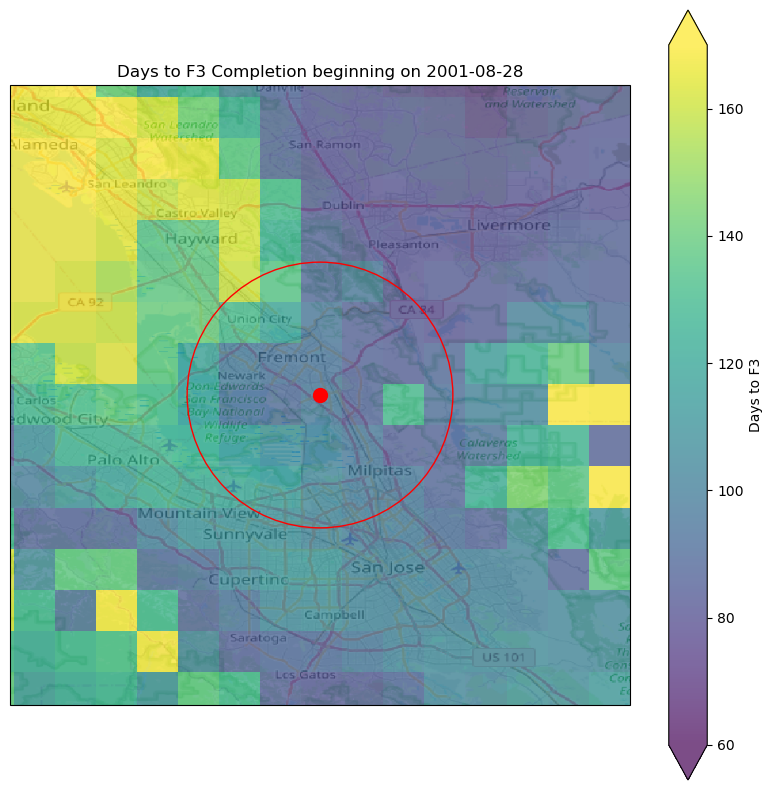

In [15]:
import xarray as xr
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
from matplotlib.patches import Circle
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.img_tiles as cimgt
import datetime

def plot_netcdf_with_point_and_circle(netcdf_file, point_lat, point_lon, window_size_pixels, circle_radius_km, alpha=1.0):
    # Load the NetCDF file
    data = xr.open_dataset(netcdf_file)
    
    # Select the variable you want to plot (assuming 'degree_days' is the variable of interest)
    data_array = data['degree_days']
    
    # Convert the window size from pixels to degrees (approximation)
    # Assuming 1 degree ~ 111 km
    window_size_deg = window_size_pixels / 111.32
    
    # Define the extent of the plot
    extent = [
        point_lon - window_size_deg / 2,
        point_lon + window_size_deg / 2,
        point_lat - window_size_deg / 2,
        point_lat + window_size_deg / 2
    ]
    print(extent)
    # Create a plot with a basemap
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
    ax.set_extent(extent, crs=ccrs.PlateCarree())
    
    # Add an OSM basemap
    osm = cimgt.OSM()
    ax.add_image(osm, 10)
    
    # Plot the data
    data_array.plot(ax=ax, cmap='viridis', alpha=alpha, transform=ccrs.PlateCarree(), add_colorbar=True, vmin=60, vmax=170,cbar_kwargs={'label': 'Days to F3'})
    

    #create date from day of year

    date = datetime.datetime(2001, 1, 1) + datetime.timedelta(240 - 1)
    # Plot the point
    ax.plot(point_lon, point_lat, 'ro', markersize=10, transform=ccrs.PlateCarree())
    
    # Plot the circle
    circle_radius_deg = circle_radius_km / 111.32  # Convert radius from km to degrees (approximation)
    circle = Circle((point_lon, point_lat), circle_radius_deg, color='red', fill=False, transform=ccrs.PlateCarree())
    ax.add_patch(circle)
    
    # Add labels and title
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title('Days to F3 Completion beginning on ' + date.strftime('%Y-%m-%d'))
    

    
    # Show the plot
    plt.show()

# Example usage
netcdf_file = "../data/socal_daily_completions/daily_F3_completions2001240.nc"
point_lat = 37.51
point_lon = -121.96
window_size_pixels = 70  # Example window size in pixels
circle_radius_km = 15  # Example circle radius in kilometers
alpha = 0.7  # Example alpha transparency

plot_netcdf_with_point_and_circle(netcdf_file, point_lat, point_lon, window_size_pixels, circle_radius_km, alpha)

[-124.20577793747754, -119.71422206252245, 35.26422206252246, 39.75577793747754]


TypeError: No numeric data to plot.

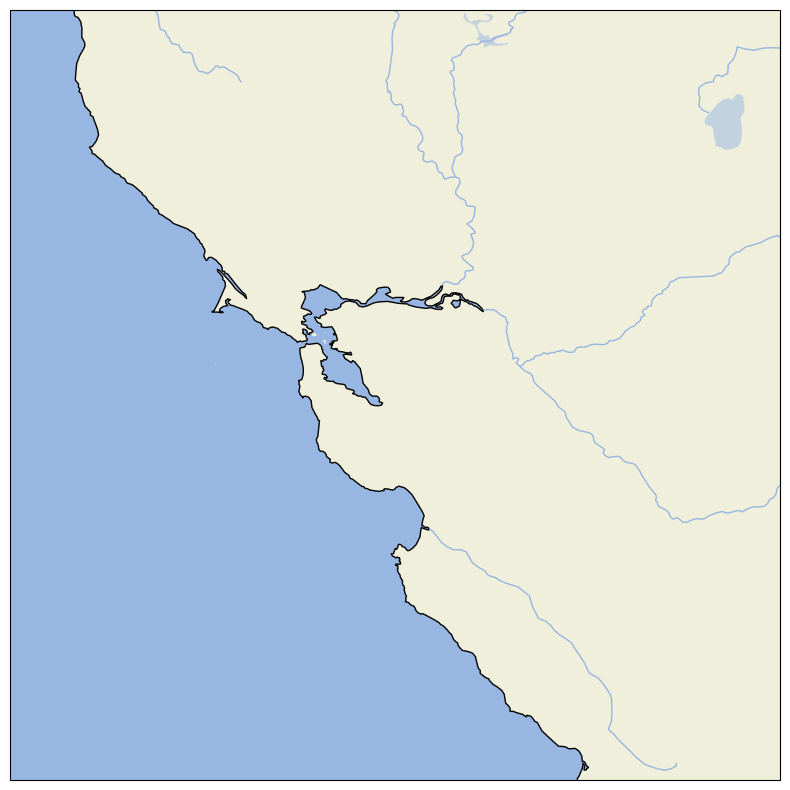

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
from matplotlib.patches import Circle
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def plot_netcdf_with_point_and_circle(netcdf_file, point_lat, point_lon, window_size_pixels, circle_radius_km, alpha=1.0):
    # Load the NetCDF file
    data = xr.open_dataset(netcdf_file)
    
    # Select the variable you want to plot (assuming 'degree_days' is the variable of interest)
    data_array = data['degree_days']
    
    # Convert the window size from pixels to degrees (approximation)
    # Assuming 1 degree ~ 111 km
    window_size_deg = window_size_pixels / 111.32
    
    # Define the extent of the plot
    extent = [
        point_lon - window_size_deg / 2,
        point_lon + window_size_deg / 2,
        point_lat - window_size_deg / 2,
        point_lat + window_size_deg / 2
    ]
    
    print(extent)
    # Subset the data to the extent of the plotted area
    subset_data = data_array.sel(longitude=slice(extent[0], extent[1]), latitude=slice(extent[2], extent[3]))
    
    # Create a plot with a basemap
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
    ax.set_extent(extent, crs=ccrs.PlateCarree())
    
    # Add a basemap
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.RIVERS)
    
    # Plot the data
    subset_data.plot(ax=ax, cmap='viridis', alpha=alpha, transform=ccrs.PlateCarree(), add_colorbar=True)
    
    # Plot the point
    ax.plot(point_lon, point_lat, 'ro', markersize=10, transform=ccrs.PlateCarree())
    
    # Plot the circle
    circle_radius_deg = circle_radius_km / 111.32  # Convert radius from km to degrees (approximation)
    circle = Circle((point_lon, point_lat), circle_radius_deg, color='red', fill=False, transform=ccrs.PlateCarree())
    ax.add_patch(circle)
    
    # Add labels and title
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title('Degree Days with Point and Circle')
    
    # Show the plot
    plt.show()

# Example usage
netcdf_file = "../data/socal_daily_completions/daily_F3_completions2001320.nc"
point_lat = 37.51
point_lon = -121.96
window_size_pixels = 500  # Example window size in pixels
circle_radius_km = 15  # Example circle radius in kilometers
alpha = 0.6  # Example alpha transparency

plot_netcdf_with_point_and_circle(netcdf_file, point_lat, point_lon, window_size_pixels, circle_radius_km, alpha)

In [18]:
import os
import requests
from datetime import datetime, timedelta

# Define the base URL pattern
base_url = "https://thredds.daac.ornl.gov/thredds/ncss/grid/ornldaac/2129/daymet_v4_daily_na_{var}_{year}.nc"

# Define the bounding box and other parameters
bounding_box = [-122.27440891124685, -121.64559108875314, 37.19559108875314, 37.824408911246856]
variables = ['tmin', 'tmax']
start_date = datetime(2001, 8, 28)
end_date = datetime(2002, 3, 1)
time_increment = timedelta(days=20)
output_dir = "data/daymet"

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Function to construct the query URL
def construct_url(var, year, start_time, end_time):
    url = base_url.format(var=var, year=year)
    query_params = (
        f"?var=lat&var=lon&var={var}"
        f"&north={bounding_box[3]}&west={bounding_box[0]}"
        f"&east={bounding_box[1]}&south={bounding_box[2]}"
        f"&disableProjSubset=on&horizStride=1"
        f"&time_start={start_time.isoformat()}Z"
        f"&time_end={end_time.isoformat()}Z"
        f"&timeStride=1&accept=netcdf"
    )
    return url + query_params

# Function to download data
def download_data(url, output_file):
    response = requests.get(url)
    if response.status_code == 200:
        with open(output_file, 'wb') as f:
            f.write(response.content)
        print(f"Saved: {output_file}")
    else:
        print(f"Failed to download: {url}")

# Loop through the date range and download data
current_start_date = start_date
while current_start_date < end_date:
    current_end_date = min(current_start_date + time_increment, end_date)
    for var in variables:
        year = current_start_date.year
        url = construct_url(var, year, current_start_date, current_end_date)
        output_file = os.path.join(output_dir, f"daymet_{var}_{current_start_date.strftime('%Y%m%d')}_{current_end_date.strftime('%Y%m%d')}.nc")
        download_data(url, output_file)
    current_start_date = current_end_date + timedelta(days=1)

Saved: data/daymet\daymet_tmin_20010828_20010917.nc
Saved: data/daymet\daymet_tmax_20010828_20010917.nc
Saved: data/daymet\daymet_tmin_20010918_20011008.nc
Saved: data/daymet\daymet_tmax_20010918_20011008.nc
Saved: data/daymet\daymet_tmin_20011009_20011029.nc
Saved: data/daymet\daymet_tmax_20011009_20011029.nc
Saved: data/daymet\daymet_tmin_20011030_20011119.nc
Saved: data/daymet\daymet_tmax_20011030_20011119.nc
Saved: data/daymet\daymet_tmin_20011120_20011210.nc
Saved: data/daymet\daymet_tmax_20011120_20011210.nc
Saved: data/daymet\daymet_tmin_20011211_20011231.nc
Saved: data/daymet\daymet_tmax_20011211_20011231.nc
Saved: data/daymet\daymet_tmin_20020101_20020121.nc
Saved: data/daymet\daymet_tmax_20020101_20020121.nc
Saved: data/daymet\daymet_tmin_20020122_20020211.nc
Saved: data/daymet\daymet_tmax_20020122_20020211.nc
Saved: data/daymet\daymet_tmin_20020212_20020301.nc
Saved: data/daymet\daymet_tmax_20020212_20020301.nc


In [16]:
import geopandas as gpd
import matplotlib.pyplot as plt
import requests
import pyproj
import datetime as dt 
from rasterio.features import Affine
from pydap.client import open_url
from pydap.cas.urs import setup_session
import xarray as xr
import rioxarray
import shapely
import rasterio
import time
from shapely.geometry import mapping

import pyproj

# Define the Daymet projection
daymet_proj = "+proj=lcc +ellps=WGS84 +a=6378137 +b=6356752.314245 +lat_1=25 +lat_2=60 +lon_0=-100 +lat_0=42.5 +x_0=0 +y_0=0 +units=m +no_defs"

# Define the geographic bounding box (lon_min, lat_min, lon_max, lat_max)
bounding_box = [-122.27440891124685, -121.64559108875314, 37.19559108875314, 37.824408911246856]

# Create a transformer to convert from geographic coordinates to the Daymet projection
transformer = pyproj.Transformer.from_crs("EPSG:4326", daymet_proj, always_xy=True)

# Convert the bounding box coordinates
lon_min, lat_min = transformer.transform(bounding_box[0], bounding_box[1])
lon_max, lat_max = transformer.transform(bounding_box[2], bounding_box[3])

# Define the bounding box in the Daymet projection
bounding_box_dayproj = [lon_min, lat_min, lon_max, lat_max]

# Print the converted bounding box
for g_name in granule_names:
    print(' ***GRANULE_NAME*** ---->', g_name)
    granule_dap = thredds_url + g_name.replace('Daymet_Daily_V4.','')
    print(granule_dap)
    
    # Using pydap's open_url 
    thredds_ds = open_url(granule_dap) 
    
    # Xarray DataSet - opening dataset via remote OPeNDAP 
    ds = xr.open_dataset(xr.backends.PydapDataStore(thredds_ds), decode_coords="all")
        
    temp=ds['prcp'].sel(x=slice(lccbounds.minx[0],lccbounds.maxx[0]), y=slice(lccbounds.maxy[0],lccbounds.miny[0]))
    
    if cnt==0:
        prcp = temp
    else:
        prcp = xr.concat([prcp, temp], dim="time")
    
    cnt += 1
    

# save to netcdf
prcp.to_netcdf(var + '_tdssubset.nc')
print("Processing Time: ", time.time() - before, 'seconds')
#Processing Time:  50.4509379863739 seconds

NameError: name 'granule_names' is not defined

In [23]:
output_dir = "data/daymet"
nc_files = [os.path.join(output_dir, f) for f in os.listdir(output_dir) if f.endswith('.nc')]
combined_data = xr.open_mfdataset(nc_files, combine='by_coords')

# Move lat and lon from data variables to coordinates
combined_data = combined_data.set_coords(['lat', 'lon'])
combined_data = combined_data.drop_vars('lambert_conformal_conic')

# Display the combined dataset
print(combined_data)

<xarray.Dataset> Size: 15MB
Dimensions:  (time: 177, y: 79, x: 69)
Coordinates:
    lat      (time, y, x) float32 4MB dask.array<chunksize=(20, 79, 69), meta=np.ndarray>
    lon      (time, y, x) float32 4MB dask.array<chunksize=(20, 79, 69), meta=np.ndarray>
  * y        (y) float32 316B -247.0 -248.0 -249.0 ... -323.0 -324.0 -325.0
  * x        (x) float32 276B -1.873e+03 -1.872e+03 ... -1.806e+03 -1.805e+03
  * time     (time) datetime64[ns] 1kB 2001-08-28T12:00:00 ... 2002-02-28T12:...
Data variables:
    tmax     (time, y, x) float32 4MB dask.array<chunksize=(20, 79, 69), meta=np.ndarray>
    tmin     (time, y, x) float32 4MB dask.array<chunksize=(20, 79, 69), meta=np.ndarray>
Attributes:
    start_year:          2001
    source:              Daymet Software Version 4.0
    Version_software:    Daymet Software Version 4.0
    Version_data:        Daymet Data Version 4.0
    Conventions:         CF-1.6
    citation:            Please see http://daymet.ornl.gov/ for current Dayme...

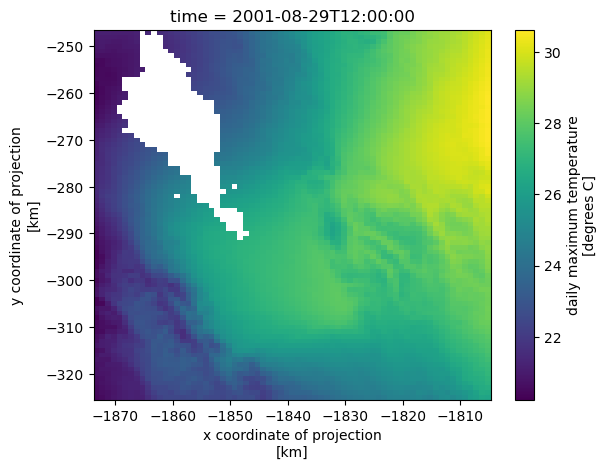

In [ ]:
plt_dat = combined_data['tmax'].isel(time=1).plot


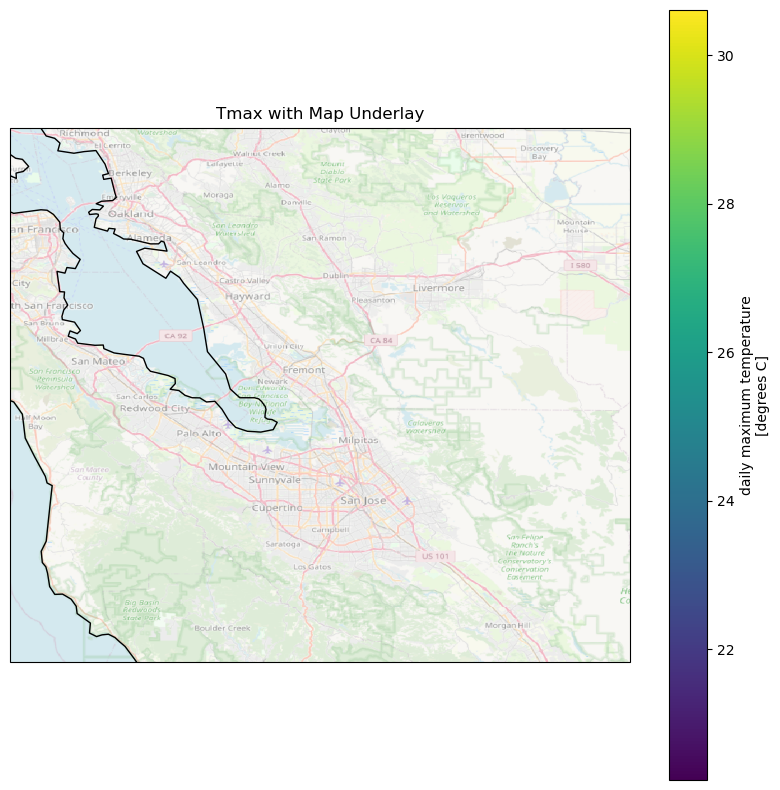

In [29]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.img_tiles as cimgt

# Load all the downloaded NetCDF files into a single xarray dataset
output_dir = "data/daymet"
nc_files = [os.path.join(output_dir, f) for f in os.listdir(output_dir) if f.endswith('.nc')]
combined_data = xr.open_mfdataset(nc_files, combine='by_coords')

# Move lat and lon from data variables to coordinates
combined_data = combined_data.set_coords(['lat', 'lon'])

# Remove the lambert_conformal_conic data variable
combined_data = combined_data.drop_vars('lambert_conformal_conic')

# Convert dask arrays to numpy arrays
combined_data['time'] = combined_data['time'].compute()
combined_data['lat'] = combined_data['lat'].compute()
combined_data['lon'] = combined_data['lon'].compute()

# Select the data to plot and compute it
plt_dat = combined_data['tmax'].isel(time=1).compute()

# Create a plot with a basemap
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([plt_dat.lon.min(), plt_dat.lon.max(), plt_dat.lat.min(), plt_dat.lat.max()], crs=ccrs.PlateCarree())

# Add an OSM basemap with alpha transparency
osm = cimgt.OSM()
ax.add_image(osm, 10, alpha=0.5)

# Plot the data
plt_dat.plot(ax=ax, cmap='viridis', transform=ccrs.PlateCarree(), add_colorbar=True)

# Add additional map features
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

# Add labels and title
ax.set_title('Tmax with Map Underlay')

# Show the plot
plt.show()


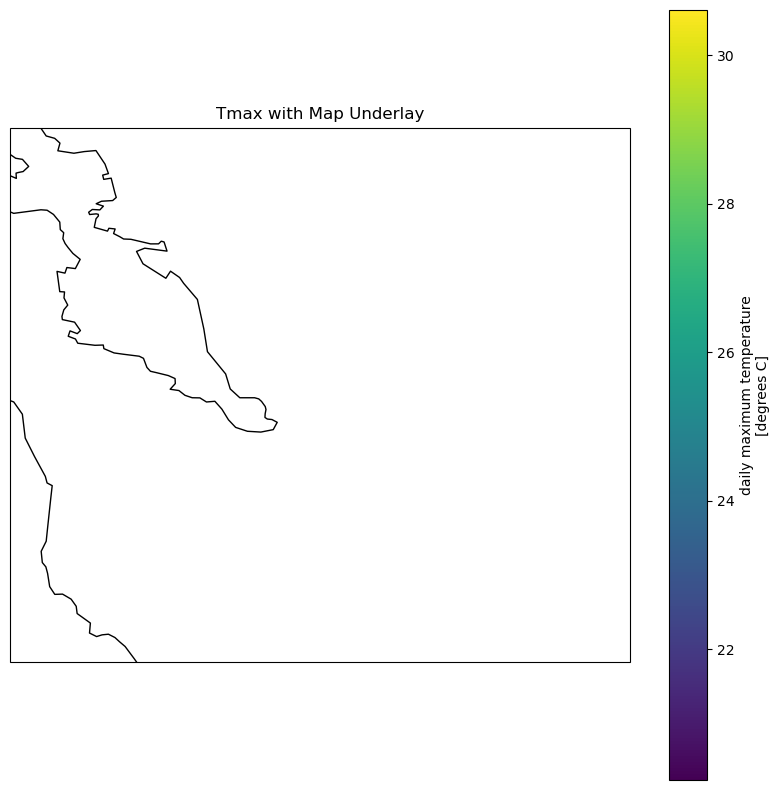

In [28]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.img_tiles as cimgt

# Load all the downloaded NetCDF files into a single xarray dataset
output_dir = "data/daymet"
nc_files = [os.path.join(output_dir, f) for f in os.listdir(output_dir) if f.endswith('.nc')]
combined_data = xr.open_mfdataset(nc_files, combine='by_coords')

# Move lat and lon from data variables to coordinates
combined_data = combined_data.set_coords(['lat', 'lon'])

# Remove the lambert_conformal_conic data variable
combined_data = combined_data.drop_vars('lambert_conformal_conic')

# Convert dask arrays to numpy arrays
combined_data['time'] = combined_data['time'].compute()
combined_data['lat'] = combined_data['lat'].compute()
combined_data['lon'] = combined_data['lon'].compute()

# Select the data to plot
plt_dat = combined_data['tmax'].isel(time=1)

# Create a plot with a basemap
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([plt_dat.lon.min(), plt_dat.lon.max(), plt_dat.lat.min(), plt_dat.lat.max()], crs=ccrs.PlateCarree())

# Add an OSM basemap with alpha transparency
osm = cimgt.OSM()
#ax.add_image(osm, 10, alpha=0.5)

# Plot the data
plt_dat.plot(ax=ax, cmap='viridis', transform=ccrs.PlateCarree(), add_colorbar=True)

# Add additional map features
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

# Add labels and title
ax.set_title('Tmax with Map Underlay')

# Show the plot
plt.show()

In [11]:
mask

NameError: name 'mask' is not defined

In [ ]:
data

In [8]:
results_da['degree_days'].values

array([[[156., 156., 156., ..., 190., 190., 191.],
        [157., 156., 156., ..., 191., 185., 184.],
        [157., 156., 156., ..., 192., 187., 182.],
        ...,
        [ nan,  nan,  nan, ..., 148., 148., 150.],
        [ nan,  nan,  nan, ..., 149., 148., 147.],
        [ nan,  nan,  nan, ..., 150., 149., 149.]]])

In [14]:
combined_dd_data.isel(t=0).degree_days.values

array([[1.10085949e+00, 1.13950233e+00, 1.16942894e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.06149747e+00, 1.10403201e+00, 1.14236516e+00, ...,
        0.00000000e+00, 3.59375052e-05, 9.22642195e-03],
       [1.10858299e+00, 1.12941546e+00, 1.14944350e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.57561348e-02],
       ...,
       [           nan,            nan,            nan, ...,
        4.81327316e-01, 3.42972078e-01, 7.32291536e-02],
       [           nan,            nan,            nan, ...,
        4.04791540e-01, 3.96108514e-01, 3.05512246e-01],
       [           nan,            nan,            nan, ...,
        4.02182994e-01, 3.93493350e-01, 3.68214062e-01]])

In [8]:
combined_dd_data_chunked.isel(t = 1)

<xarray.Dataset> Size: 75kB
Dimensions:      (longitude: 96, latitude: 96)
Coordinates:
    t            datetime64[ns] 8B 2000-01-02
  * longitude    (longitude) float64 768B -121.5 -121.5 -121.4 ... -117.6 -117.5
  * latitude     (latitude) float64 768B 38.54 38.5 38.46 ... 34.67 34.62 34.58
Data variables:
    degree_days  (latitude, longitude) float64 74kB dask.array<chunksize=(10, 10), meta=np.ndarray>

In [13]:
results_da = results_da.compute()

c:\Users\Thomas.Worm\AppData\Local\anaconda3\envs\fruitflypheno\Lib\site-packages\distributed\client.py:3361: UserWarning: Sending large graph of size 33.72 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


In [3]:
import datetime
from datetime import timedelta

# Loop through each date from 1 to 365
for year in range(2000, 2001):
    for day_of_year in range(1, 3):
        start_day = datetime.datetime(year, 1, 1) + timedelta(days=day_of_year - 1)
        print(start_day)
        result = apply_fflies_model_run(combined_dd_data_chunked, start_day, dd_threshold=754)
        results.append(result)
results_da = xr.concat(results, dim='start_day_of_year')

results_test = results.compute()

2000-01-01 00:00:00


NameError: name 'combined_dd_data_chunked' is not defined

In [31]:
import xarray as xr
import hvplot.xarray
latitude = 36.631151
longitude = -119.338321
window_size = 20

# Find the indices of the given point
lat_idx = results_da.latitude.sel(latitude=latitude, method='nearest').item()
lon_idx = results_da.longitude.sel(longitude=longitude, method='nearest').item()

# Find the index positions
lat_pos = results_da.latitude.values.tolist().index(lat_idx)
lon_pos = results_da.longitude.values.tolist().index(lon_idx)

# Select a window of pixels around those indices
subset_da = results_da.isel(
    latitude=slice(lat_pos - window_size, lat_pos + window_size + 1),
    longitude=slice(lon_pos - window_size, lon_pos + window_size + 1)
)

# Assuming results_da is already defined and contains the results
# Example: results_da = xr.open_dataset("results.nc")['your_variable']
results_da_array = subset_da['degree_days']
# Visualize the DataArray with a map and a slider for start_day_of_year
plot = results_da_array.hvplot.quadmesh(
    x='longitude', y='latitude', z='degree_days',  # Adjust 'values' to the actual variable name in results_da
    geo=True, tiles='OSM', frame_width=800, frame_height=600,
    clim=(results_da_array.min(), results_da_array.max()),  # Set color limits
    title='Degree Days Accumulation',
    groupby='start_day_of_year',  # Slider for start_day_of_year
    cmap='viridis'  # Choose a colormap
)

# Display the plot
hvplot.show(plot)

Launching server at http://localhost:53397


In [134]:
import xarray as xr
import holoviews as hv
import hvplot.xarray
import geoviews as gv
from shapely.geometry import Point
import geopandas as gpd
from cartopy import crs as ccrs
import panel as pn

# Enable Holoviews and Geoviews extensions
hv.extension('bokeh')
gv.extension('bokeh')

# Load the NetCDF file
data = xr.open_dataset("../data/socal_daily_completions/daily_F3_completions2001320.nc")

# Select the variable you want to plot (assuming 'degree_days' is the variable of interest)
data_array = data['degree_days']

# Create an interactive plot using hvplot
plot = data_array.hvplot.quadmesh(x='longitude', y='latitude', rasterize=True, cmap='viridis', title='Degree Days', project=True, geo=True, alpha=0.1)

# Define the point and radius
point_lat = 32.18
point_lon = -117.20
radius_km = 15

# Create a point
point = gv.Points([(point_lon, point_lat)], crs=ccrs.PlateCarree(), label='Point').opts(color='red', size=10, alpha=0.8)

# Create a circle with a radius of 15 km
radius_deg = radius_km / 111.32  # Convert radius from km to degrees (approximation)
circle = Point(point_lon, point_lat).buffer(radius_deg)
circle_gdf = gpd.GeoDataFrame(geometry=[circle], crs="EPSG:4326")
circle_path = gv.Path([circle_gdf.geometry[0].exterior.coords], crs=ccrs.PlateCarree(), label='Circle').opts(color='red', alpha=0.8)

# Overlay the point and circle on the plot
combined_plot = plot * point * circle_path

# Add a basemap
tiles = gv.tile_sources.OSM()

# Combine the basemap with the plot
final_plot = tiles * combined_plot

# Create a Panel layout with increased window size
layout = pn.Column(final_plot.opts(width=1000, height=1000)).servable()

# Serve the plot using panel with increased window size
pn.serve(layout, port=5002, show=True, title='Interactive Plot', start=True)

Launching server at http://localhost:5002


In [ ]:
import xarray as xr
import holoviews as hv
import hvplot.xarray

# Enable Holoviews extension
hv.extension('bokeh')

# Load the NetCDF file
data = xr.open_dataset("../data/socal_daily_completions/daily_F3_completions2001320.nc")

# Select the variable you want to plot (assuming 'degree_days' is the variable of interest)
data_array = data['degree_days']

# Create an interactive plot using hvplo
plot = data_array.hvplot.quadmesh(x='longitude', y='latitude', rasterize=True, cmap='viridis', title='Degree Days')

# Display the plot
hv.output(plot)


ValueError: The subset data is empty. Please check the extent and the data.

In [ ]:
import xarray as xr
import holoviews as hv
import hvplot.xarray

# Enable Holoviews extension
hv.extension('bokeh')

# Load the NetCDF file
data = xr.open_dataset("../data/socal_daily_completions/daily_F3_completions2001320.nc")

# Select the variable you want to plot (assuming 'degree_days' is the variable of interest)
data_array = data['degree_days']

# Create an interactive plot using hvplot
plot = data_array.hvplot.quadmesh(x='longitude', y='latitude', rasterize=True, cmap='viridis', title='Degree Days')

# Display the plot
hv.output(plot)

In [10]:
mod_1_data

<xarray.Dataset> Size: 27MB
Dimensions:      (day_of_year: 366, latitude: 96, longitude: 96)
Coordinates:
  * longitude    (longitude) float64 768B -121.5 -121.5 -121.4 ... -117.6 -117.5
  * latitude     (latitude) float64 768B 38.54 38.5 38.46 ... 34.67 34.62 34.58
  * day_of_year  (day_of_year) int32 1kB 1 2 3 4 5 6 ... 361 362 363 364 365 366
Data variables:
    degree_days  (day_of_year, latitude, longitude) float64 27MB 1.117 ... 1.154

In [9]:
import xarray as xr
from glob import glob

def read_netcdfs(files, coords, LTT, UTT):
    def process_one_path(path):
        # Use a context manager to ensure the file gets closed after use
        with xr.open_dataset(path) as ds:
            # Initialize an empty list to store data for each point or bounding box
            point_datasets = []
            
            if isinstance(coords, tuple) and len(coords) == 2:
                # Single point case
                lat, lon = coords
                ds_point = ds.sel(latitude=lat, longitude=lon, method="nearest")
                ds_point["degree_days"] = single_sine_horizontal_cutoff(
                    ds_point["tmin"], ds_point["tmax"], LTT, UTT
                )
                ds_point = ds_point.drop_vars(["tmin", "tmax"])
                ds_point.load()
                point_datasets.append(ds_point)
            elif isinstance(coords, dict) and all(k in coords for k in ["lat_min", "lat_max", "lon_min", "lon_max"]):
                # Bounding box case
                lat_min, lat_max = coords["lat_min"], coords["lat_max"]
                lon_min, lon_max = coords["lon_min"], coords["lon_max"]
                ds_bbox = ds.sel(latitude=slice(lat_min, lat_max), longitude=slice(lon_min, lon_max))
                ds_bbox["degree_days"] = single_sine_horizontal_cutoff(
                    ds_bbox["tmin"], ds_bbox["tmax"], LTT, UTT
                )
                ds_bbox = ds_bbox.drop_vars(["tmin", "tmax"])
                ds_bbox.load()
                point_datasets.append(ds_bbox)
            else:
                raise ValueError("Invalid coordinates format. Provide a tuple for a single point or a dictionary for a bounding box.")
            
            # Concatenate data for all points or bounding boxes along a new dimension 'point'
            ds_combined = xr.concat(point_datasets, dim="point")
            return ds_combined

    # Get a sorted list of file paths
    paths = sorted(glob(files))
    # Process each file and store the datasets in a list
    datasets = [process_one_path(p) for p in paths]
    # Concatenate all datasets along the specified dimension
    combined = xr.concat(datasets, "t")
    return combined

In [121]:
import xarray as xr
import holoviews as hv
import hvplot.xarray
import geoviews as gv
from shapely.geometry import Point
import geopandas as gpd
from cartopy import crs as ccrs
import panel as pn

# Enable Holoviews and Geoviews extensions
hv.extension('bokeh')
gv.extension('bokeh')

# Load the NetCDF file
data = xr.open_dataset("../data/socal_daily_completions/daily_F3_completions2001320.nc")

# Select the variable you want to plot (assuming 'degree_days' is the variable of interest)
data_array = data['degree_days']

# Create an interactive plot using hvplot
plot = data_array.hvplot.quadmesh(x='longitude', y='latitude', rasterize=True, cmap='viridis', title='Degree Days', project=True, geo=True)

# Define the point and radius
point_lat = 32.18
point_lon = -117.20
radius_km = 15

# Create a point
point = gv.Points([(point_lon, point_lat)], crs=ccrs.PlateCarree(), label='Point').opts(color='red', size=10)

# Create a circle with a radius of 15 km
radius_deg = radius_km / 111.32  # Convert radius from km to degrees (approximation)
circle = Point(point_lon, point_lat).buffer(radius_deg)
circle_gdf = gpd.GeoDataFrame(geometry=[circle], crs="EPSG:4326")
circle_path = gv.Path([circle_gdf.geometry[0].exterior.coords], crs=ccrs.PlateCarree(), label='Circle').opts(color='red')

# Overlay the point and circle on the plot
combined_plot = plot * point * circle_path

# Add a basemap
tiles = gv.tile_sources.OSM()

# Combine the basemap with the plot
final_plot = tiles * combined_plot

# Serve the plot using panel
pn.serve(final_plot)

Launching server at http://localhost:57589


In [10]:
data = read_netcdfs( files=data_path + "PRISM/*/PRISM_temp_*.nc", coords = bbox_dict , LTT= LTT, UTT=UTT)